In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
# Loading the Excel file
df_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
schema = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/schema.csv')
df_o.head()

,Year,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
0,1990,0.107550,38.966725,65.827743,46.378637,20.227671,6.830123,19.352014,9.294826,14.623468,19203.300,45.524287,3.159834e+10,3.223406e+10,13.239219,-1915.082886,107147651,71.67,18.966502,19.811
1,1991,0.099144,42.790698,83.701053,48.656316,14.046512,8.093023,18.046512,3.148947,17.023256,19203.298,44.671039,3.095748e+10,3.161855e+10,13.987123,-1784.205078,109242834,73.16,18.889827,20.257
2,1992,0.106257,44.293015,81.344112,45.511751,12.691652,8.517888,16.524702,2.730085,17.972743,19203.296,46.728028,3.170887e+10,3.247864e+10,14.397464,-2345.101807,111272102,71.66,19.934006,20.610
3,1993,0.110814,46.277022,82.733588,43.613087,11.689351,7.926341,16.653323,0.962697,17.373899,19203.294,49.456842,3.316652e+10,3.406922e+10,15.412538,-2427.801880,113418757,70.56,23.121583,20.966
4,1994,0.117143,45.285820,84.795990,43.549010,14.105419,7.349666,16.926503,0.731233,16.406830,19203.292,50.251097,3.376866e+10,3.482447e+10,15.869455,-2686.609375,115614891,68.98,22.865865,21.328


In [ ]:
schema

,Short Code,Description
0,CEM,CO2 emissions (metric tons per capita)
1,EHP,CO2 emissions from electricity and heat produc...
2,GFC,CO2 emissions from gaseous fuel consumption (%...
3,LFC,CO2 emissions from liquid fuel consumption (% ...
4,MIC,CO2 emissions from manufacturing industries an...
5,OSE,"CO2 emissions from other sectors, excluding re..."
6,RCP,CO2 emissions from residential buildings and c...
7,SFC,CO2 emissions from solid fuel consumption (% o...
8,TRP,CO2 emissions from transport (% of total fuel ...
9,FTA,Forest area (sq. km)


In [ ]:
df_o.describe()

,Year,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
count,51.000000,32.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,2015.000000,0.291567,63.387636,75.220931,28.549583,16.537224,7.656895,13.164226,5.553008,14.802790,18953.166316,72.166590,3.393321e+11,6.193529e+11,18.841791,1050.066449,1.591800e+08,40.978420,31.750240,35.615002
std,14.866069,0.162925,37.987595,3.472936,8.954047,1.699685,1.132724,2.810459,1.866900,1.225503,157.297372,13.642557,3.132631e+11,1.083281e+12,3.981786,5266.102990,3.096783e+07,15.724785,6.594842,11.682372
min,1990.000000,0.099144,38.260406,65.827743,20.506351,11.689351,5.171029,10.919221,0.731233,13.724832,18833.132810,44.671039,3.095748e+10,3.161855e+10,13.239219,-9047.614746,1.071477e+08,25.790000,18.889827,19.811000
25%,2002.500000,0.155287,45.582702,74.179733,22.403465,16.175549,6.779581,10.920070,5.189427,14.002760,18833.133790,61.720456,5.744151e+10,5.974608e+10,15.083697,-3502.060913,1.353215e+08,27.934401,28.298718,25.092500
50%,2015.000000,0.241929,52.802313,74.367577,22.414127,16.361273,7.668232,11.077787,5.974442,14.101832,18834.000000,74.202011,1.950790e+11,2.077430e+11,16.788674,1513.770508,1.578300e+08,31.120000,31.058327,34.308000
75%,2027.500000,0.412888,62.836456,76.654423,35.177731,17.278146,8.735710,16.008169,6.003384,15.185543,19123.316000,82.574104,5.809600e+11,6.652010e+11,23.150850,6570.781006,1.828431e+08,53.545000,32.306324,43.974638
max,2040.000000,0.620000,262.319519,84.795990,48.656316,20.227671,9.144857,19.352014,12.015320,17.972743,19203.300000,94.664459,1.033270e+12,6.226670e+12,24.035830,7308.209473,2.181266e+08,73.160000,48.110923,60.904926


In [ ]:
df = df_o[df_o['Year'] <= 2021]

In [ ]:
df['CEM'] = pd.to_numeric(df['CEM'], errors='coerce')

<ipython-input-7-68d1e31cb9bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CEM'] = pd.to_numeric(df['CEM'], errors='coerce')


In [ ]:
# Assuming your DataFrame has a 'Year' column containing datetime values
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure proper datetime format
df.set_index('Year', inplace=True)

<ipython-input-8-fcc62f2b6c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure proper datetime format


In [ ]:
df.head()

,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
Year,,,,,,,,,,,,,,,,,,,
1990-01-01,0.107550,38.966725,65.827743,46.378637,20.227671,6.830123,19.352014,9.294826,14.623468,19203.300,45.524287,3.159834e+10,3.223406e+10,13.239219,-1915.082886,107147651,71.67,18.966502,19.811
1991-01-01,0.099144,42.790698,83.701053,48.656316,14.046512,8.093023,18.046512,3.148947,17.023256,19203.298,44.671039,3.095748e+10,3.161855e+10,13.987123,-1784.205078,109242834,73.16,18.889827,20.257
1992-01-01,0.106257,44.293015,81.344112,45.511751,12.691652,8.517888,16.524702,2.730085,17.972743,19203.296,46.728028,3.170887e+10,3.247864e+10,14.397464,-2345.101807,111272102,71.66,19.934006,20.610
1993-01-01,0.110814,46.277022,82.733588,43.613087,11.689351,7.926341,16.653323,0.962697,17.373899,19203.294,49.456842,3.316652e+10,3.406922e+10,15.412538,-2427.801880,113418757,70.56,23.121583,20.966
1994-01-01,0.117143,45.285820,84.795990,43.549010,14.105419,7.349666,16.926503,0.731233,16.406830,19203.292,50.251097,3.376866e+10,3.482447e+10,15.869455,-2686.609375,115614891,68.98,22.865865,21.328


Ploting Trend, Seasonality, Noise of all the Factors


==========================>  CEM  <========================




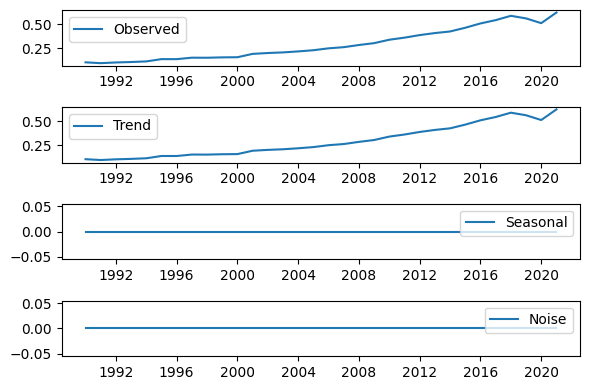



==========================>  EHP  <========================




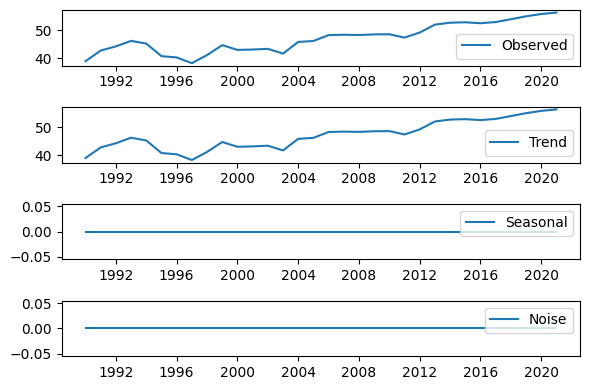



==========================>  GFC  <========================




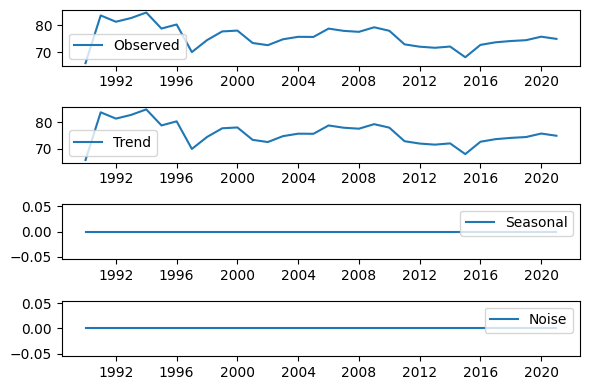



==========================>  LFC  <========================




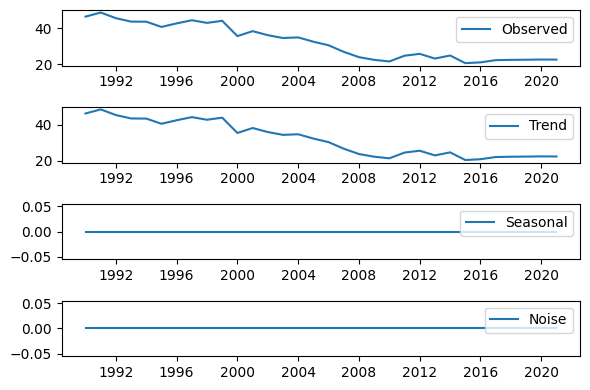



==========================>  MIC  <========================




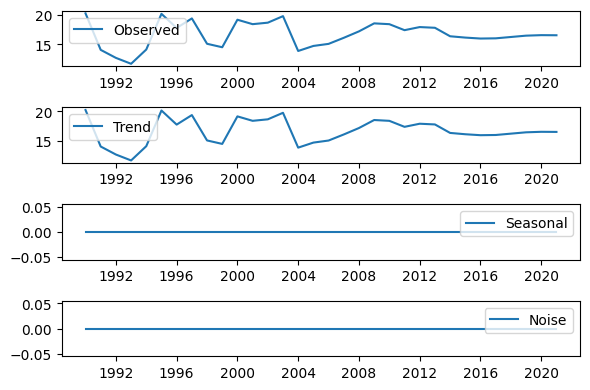



==========================>  OSE  <========================




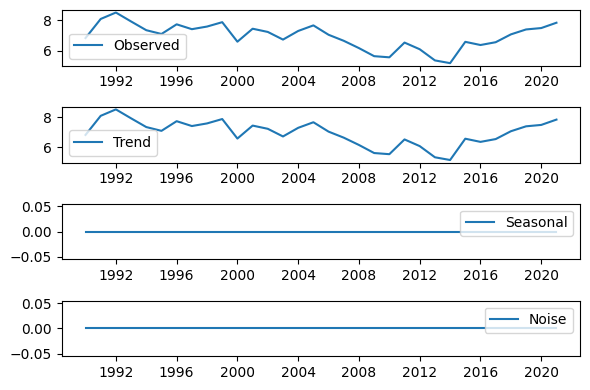



==========================>  RCP  <========================




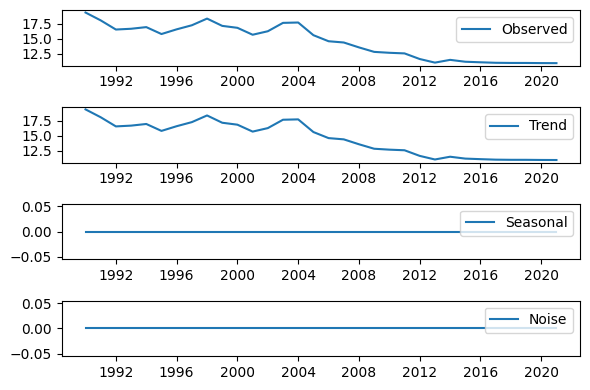



==========================>  SFC  <========================




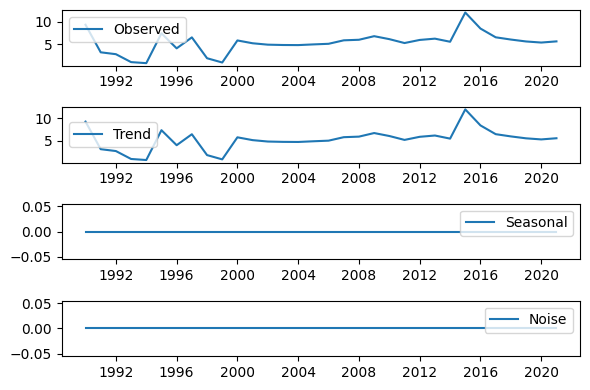



==========================>  TRP  <========================




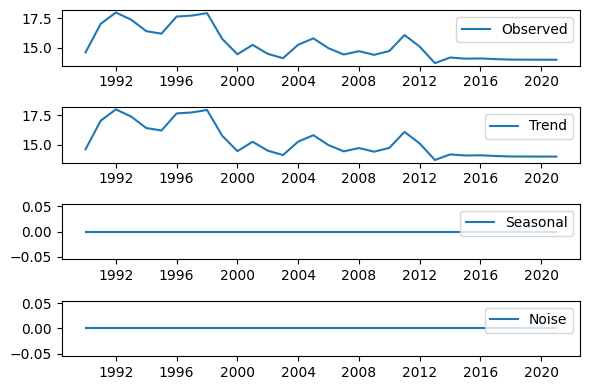



==========================>  FTA  <========================




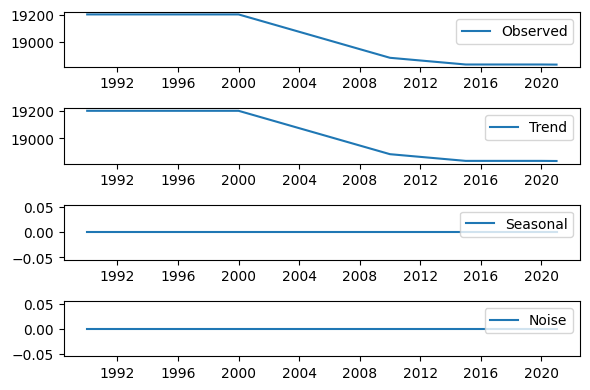



==========================>  FEC  <========================




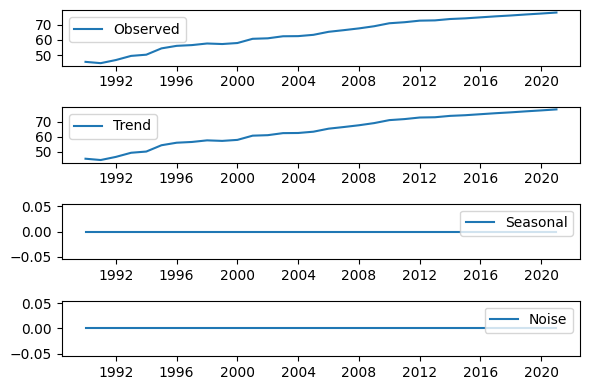



==========================>  GDP  <========================




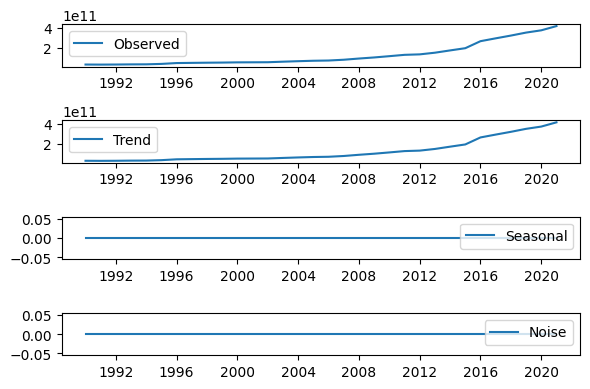



==========================>  GNI  <========================




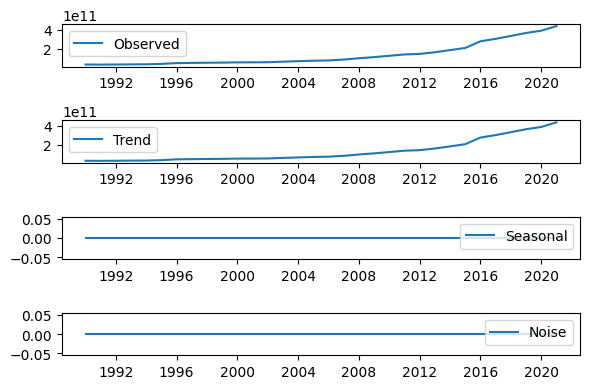



==========================>  MFG  <========================




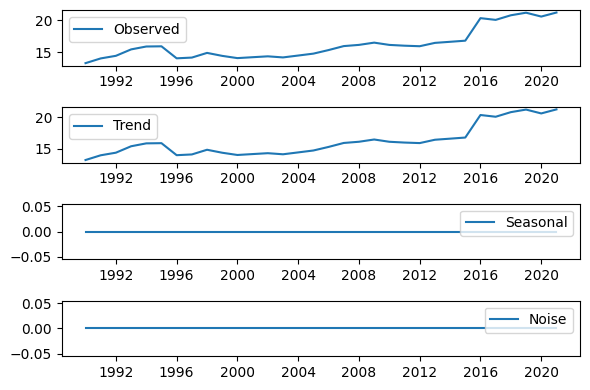



==========================>  GGE  <========================




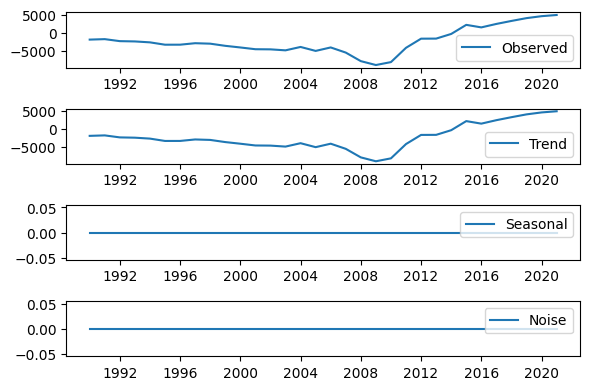



==========================>  PPL  <========================




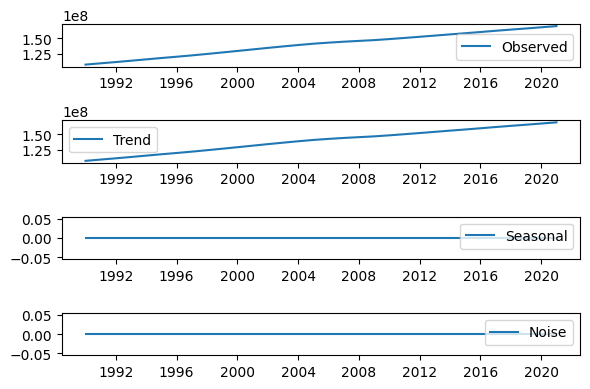



==========================>  REC  <========================




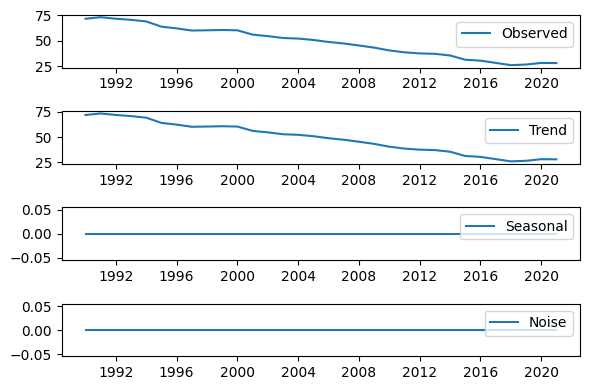



==========================>  TRD  <========================




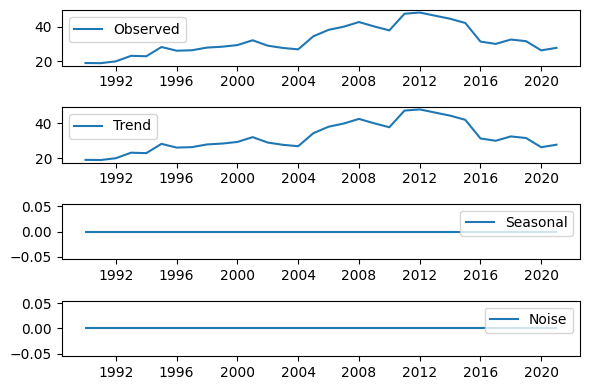



==========================>  UPP  <========================




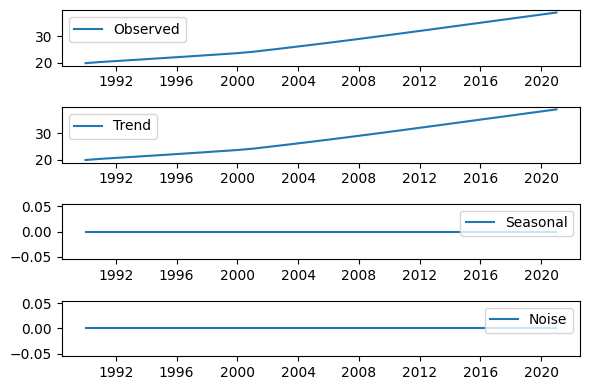

In [ ]:
print("Ploting Trend, Seasonality, Noise of all the Factors")
for items in df.columns:
  res = sm.tsa.seasonal_decompose(df[items], model='additive')

  # Plot the decomposed components

  print(f"\n===============================================================")
  print(f"\n==========================>  {items}  <========================")
  print(f"\n===============================================================\n")
  plt.figure(figsize=(6, 4))
  plt.subplot(411)
  plt.plot(res.observed, label='Observed')
  plt.legend()
  plt.subplot(412)
  plt.plot(res.trend, label='Trend')
  plt.legend()
  plt.subplot(413)
  plt.plot(res.seasonal, label='Seasonal')
  plt.legend()
  plt.subplot(414)
  plt.plot(res.resid, label='Noise')
  plt.legend()
  plt.tight_layout()
  plt.show()

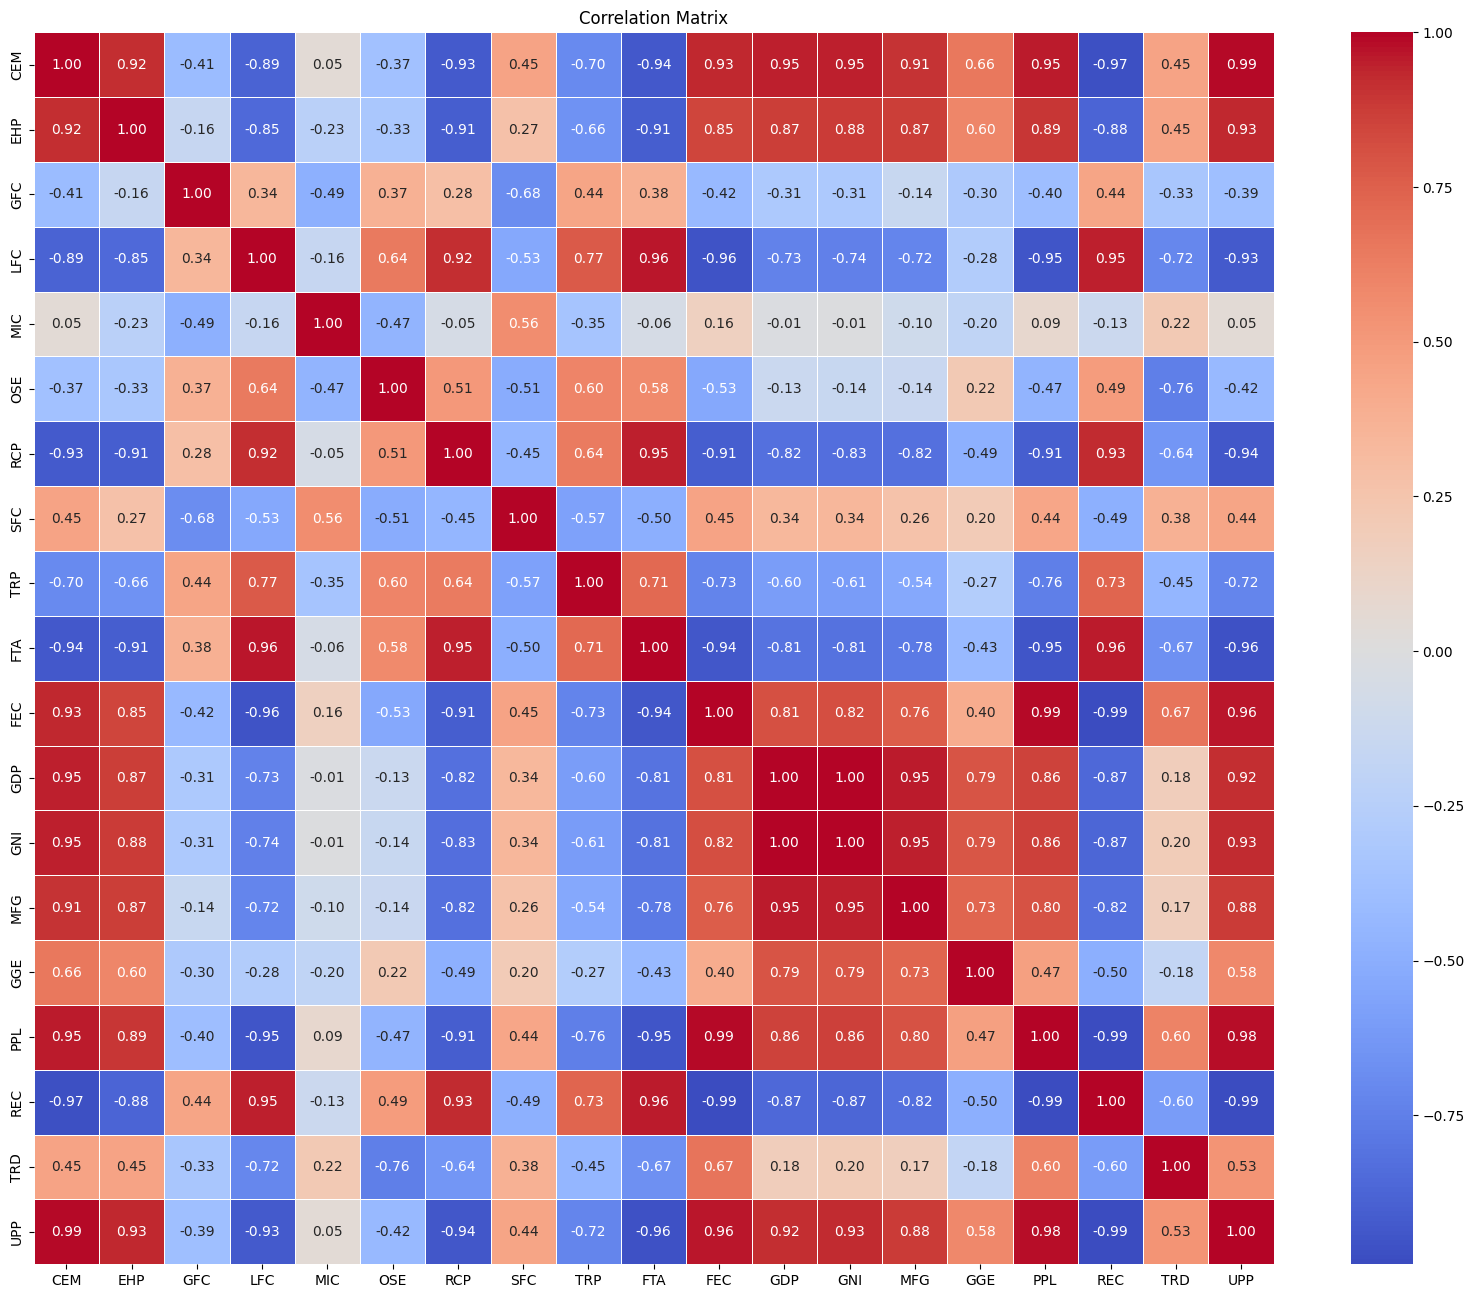

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix['CEM'].sort_values(ascending=False)

CEM    1.000000
UPP    0.988085
PPL    0.953652
GNI    0.951027
GDP    0.946872
FEC    0.931908
EHP    0.915998
MFG    0.906281
GGE    0.655926
TRD    0.454383
SFC    0.454095
MIC    0.050125
OSE   -0.373991
GFC   -0.408609
TRP   -0.701186
LFC   -0.885551
RCP   -0.926742
FTA   -0.935695
REC   -0.969493
Name: CEM, dtype: float64

In [ ]:
df = df.drop(columns=['MIC'])

array([[<Axes: title={'center': 'CEM'}>, <Axes: title={'center': 'EHP'}>,
        <Axes: title={'center': 'GFC'}>, <Axes: title={'center': 'LFC'}>],
       [<Axes: title={'center': 'OSE'}>, <Axes: title={'center': 'RCP'}>,
        <Axes: title={'center': 'SFC'}>, <Axes: title={'center': 'TRP'}>],
       [<Axes: title={'center': 'FTA'}>, <Axes: title={'center': 'FEC'}>,
        <Axes: title={'center': 'GDP'}>, <Axes: title={'center': 'GNI'}>],
       [<Axes: title={'center': 'MFG'}>, <Axes: title={'center': 'GGE'}>,
        <Axes: title={'center': 'PPL'}>, <Axes: title={'center': 'REC'}>],
       [<Axes: title={'center': 'TRD'}>, <Axes: title={'center': 'UPP'}>,
        <Axes: >, <Axes: >]], dtype=object)

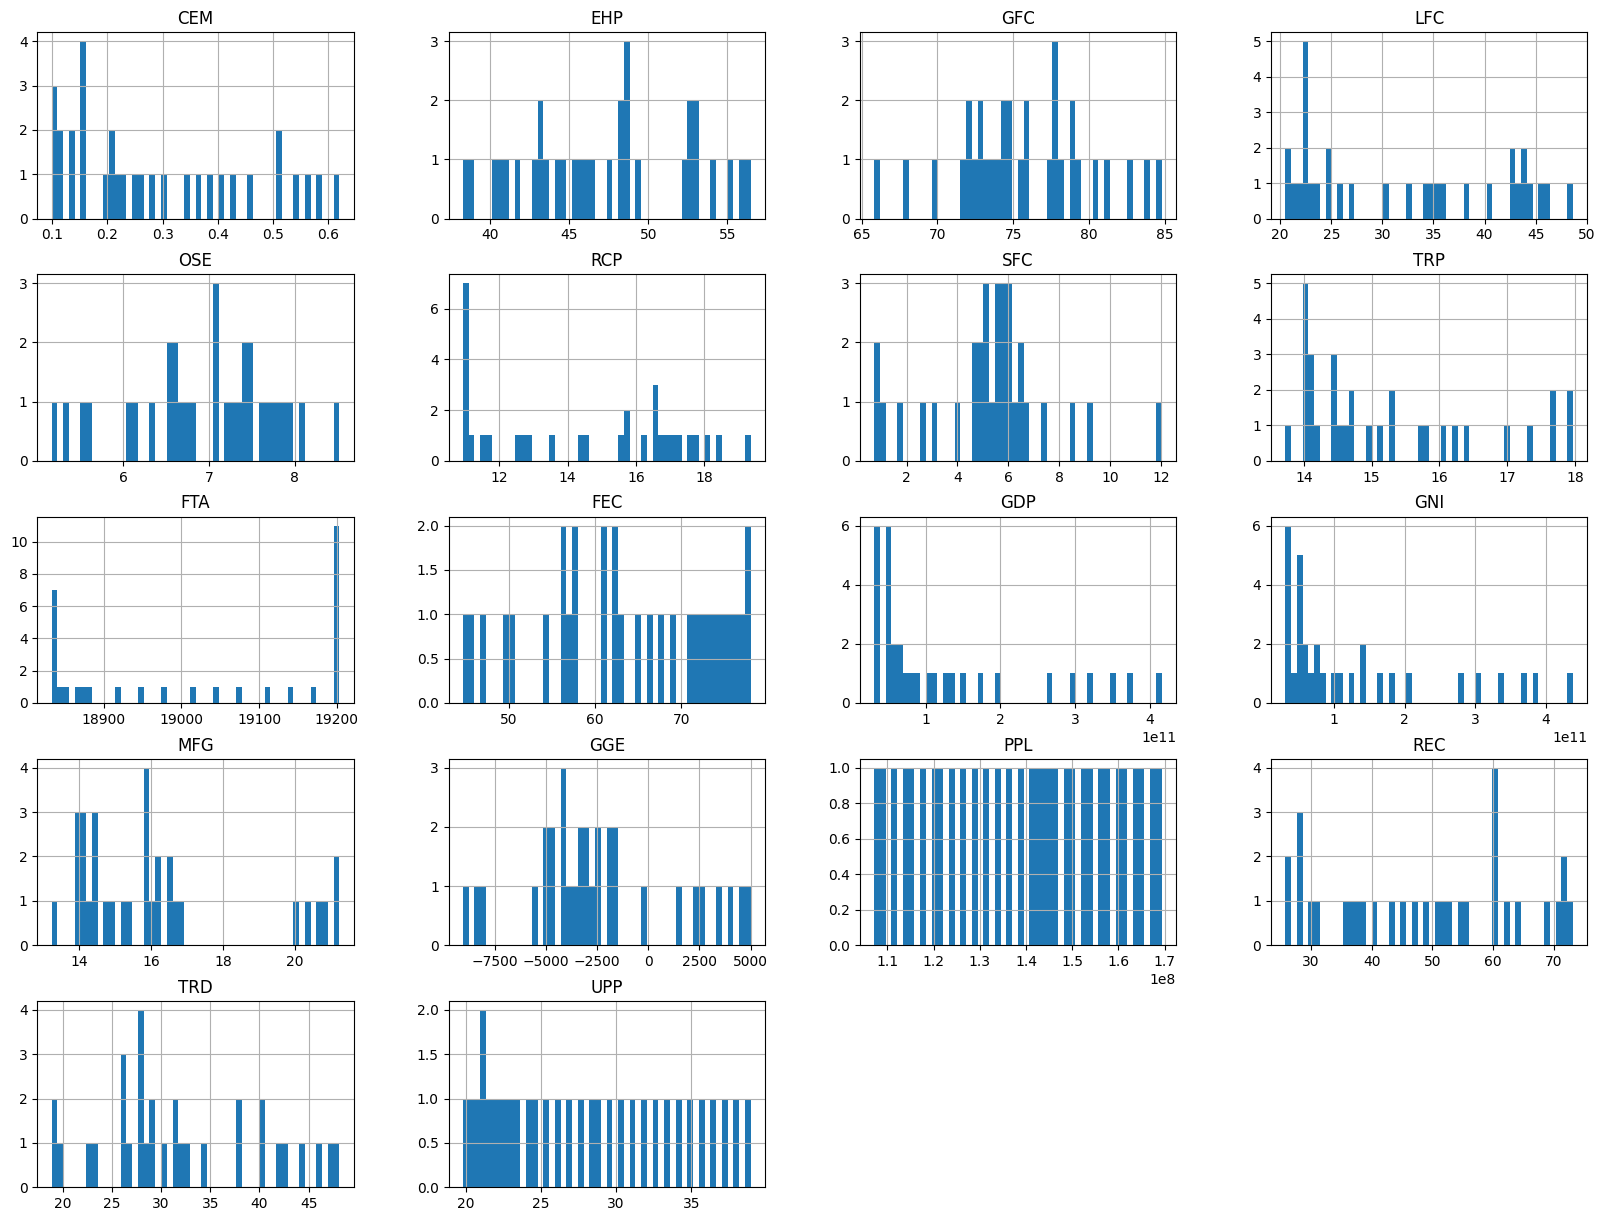

In [ ]:
df.hist(bins=50, figsize=(20,15))

array([[<Axes: xlabel='EHP', ylabel='EHP'>,
        <Axes: xlabel='LFC', ylabel='EHP'>,
        <Axes: xlabel='RCP', ylabel='EHP'>,
        <Axes: xlabel='FTA', ylabel='EHP'>,
        <Axes: xlabel='FEC', ylabel='EHP'>,
        <Axes: xlabel='GDP', ylabel='EHP'>,
        <Axes: xlabel='GNI', ylabel='EHP'>,
        <Axes: xlabel='MFG', ylabel='EHP'>,
        <Axes: xlabel='PPL', ylabel='EHP'>,
        <Axes: xlabel='REC', ylabel='EHP'>,
        <Axes: xlabel='UPP', ylabel='EHP'>,
        <Axes: xlabel='CEM', ylabel='EHP'>],
       [<Axes: xlabel='EHP', ylabel='LFC'>,
        <Axes: xlabel='LFC', ylabel='LFC'>,
        <Axes: xlabel='RCP', ylabel='LFC'>,
        <Axes: xlabel='FTA', ylabel='LFC'>,
        <Axes: xlabel='FEC', ylabel='LFC'>,
        <Axes: xlabel='GDP', ylabel='LFC'>,
        <Axes: xlabel='GNI', ylabel='LFC'>,
        <Axes: xlabel='MFG', ylabel='LFC'>,
        <Axes: xlabel='PPL', ylabel='LFC'>,
        <Axes: xlabel='REC', ylabel='LFC'>,
        <Axes: xlabel='UPP', yl

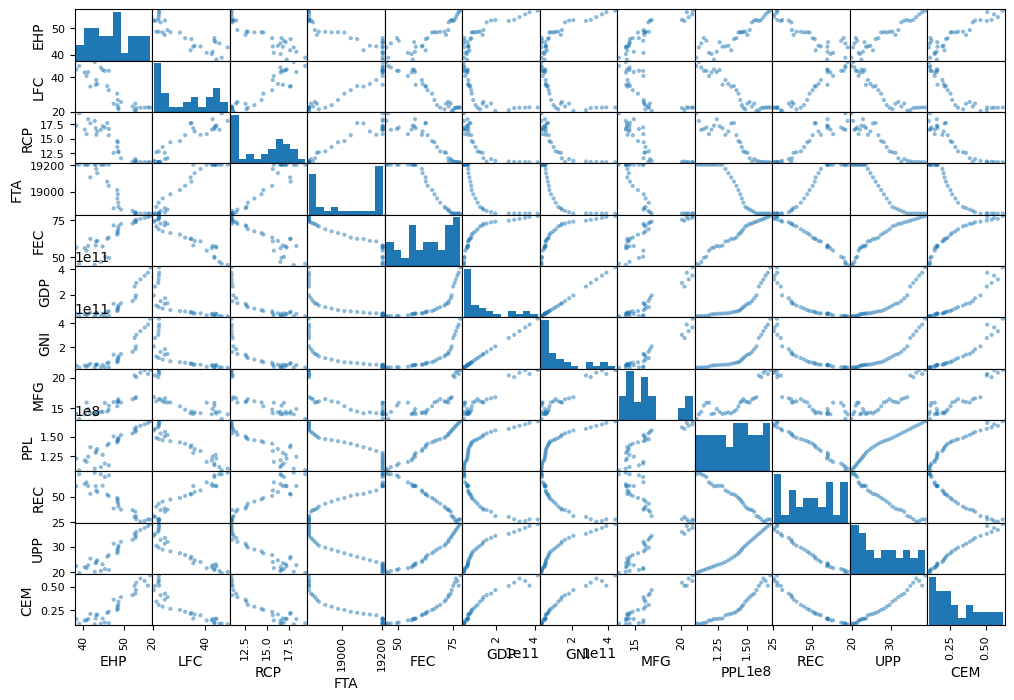

In [ ]:
attributes = ['EHP', 'LFC', 'RCP', 'FTA',
       'FEC', 'GDP', 'GNI', 'MFG', 'PPL', 'REC', 'UPP', 'CEM']

scatter_matrix(df[attributes], figsize=(12,8))

<Axes: xlabel='MFG', ylabel='CEM'>

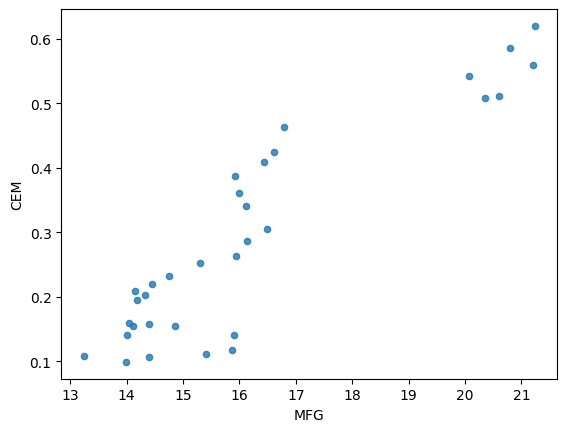

In [ ]:
df.plot(kind='scatter', x='MFG', y='CEM', alpha=0.8)

In [ ]:
df.tail()

,CEM,EHP,GFC,LFC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
Year,,,,,,,,,,,,,,,,,,
2017-01-01,0.541788,53.034348,73.648323,22.172621,6.555589,10.994927,6.493716,14.062901,18834.00000,75.525230,2.937550e+11,3.038970e+11,20.075062,2485.764893,161793964,28.010000,29.999731,35.858
2018-01-01,0.586158,54.053688,74.123665,22.341768,7.073141,10.968953,5.993553,14.021949,18834.00000,76.095413,3.213790e+11,3.342310e+11,20.802296,3324.412354,163683958,25.790000,32.514632,36.632
2019-01-01,0.559734,55.097652,74.438736,22.414127,7.399002,10.966677,5.566461,14.019230,18834.00000,76.765594,3.512380e+11,3.656260e+11,21.207945,4111.042480,165516222,26.370000,31.578051,37.405
2020-01-01,0.510648,55.923866,75.744476,22.531397,7.491343,10.944155,5.323783,14.013135,18834.00000,77.377777,3.739020e+11,3.893790e+11,20.598332,4659.354980,167420951,27.960000,26.271447,38.177
2021-01-01,0.620000,56.459362,74.921829,22.469225,7.843612,10.934448,5.584586,14.010710,18833.18945,78.038177,4.162650e+11,4.381750e+11,21.235673,4991.197266,169356251,27.812258,27.724005,38.946


In [ ]:
df = df.reset_index()
df.tail()

,Year,CEM,EHP,GFC,LFC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
27,2017-01-01,0.541788,53.034348,73.648323,22.172621,6.555589,10.994927,6.493716,14.062901,18834.00000,75.525230,2.937550e+11,3.038970e+11,20.075062,2485.764893,161793964,28.010000,29.999731,35.858
28,2018-01-01,0.586158,54.053688,74.123665,22.341768,7.073141,10.968953,5.993553,14.021949,18834.00000,76.095413,3.213790e+11,3.342310e+11,20.802296,3324.412354,163683958,25.790000,32.514632,36.632
29,2019-01-01,0.559734,55.097652,74.438736,22.414127,7.399002,10.966677,5.566461,14.019230,18834.00000,76.765594,3.512380e+11,3.656260e+11,21.207945,4111.042480,165516222,26.370000,31.578051,37.405
30,2020-01-01,0.510648,55.923866,75.744476,22.531397,7.491343,10.944155,5.323783,14.013135,18834.00000,77.377777,3.739020e+11,3.893790e+11,20.598332,4659.354980,167420951,27.960000,26.271447,38.177
31,2021-01-01,0.620000,56.459362,74.921829,22.469225,7.843612,10.934448,5.584586,14.010710,18833.18945,78.038177,4.162650e+11,4.381750e+11,21.235673,4991.197266,169356251,27.812258,27.724005,38.946


# **Testing The Performance of LSTM**

In [ ]:
# Filter data for training (2023-08-31 to 2023-09-16) and testing (2023-09-10 to 2023-09-22)
train_data = df[df['Year'] <= '2010-01-01']

In [ ]:
train_data.tail()

,Year,CEM,EHP,GFC,LFC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
16,2006-01-01,0.251722,48.337596,78.774106,30.449379,7.047457,14.578005,5.045955,14.975845,19011.365,65.330878,7.181908e+10,7.587023e+10,15.307562,-4113.313477,142628831,48.69,38.111924,27.517
17,2007-01-01,0.263587,48.471850,77.924957,26.795451,6.648794,14.369973,5.820482,14.450402,18979.379,66.417125,7.961189e+10,8.471984e+10,15.934073,-5554.934082,144135934,47.19,39.942383,28.237
18,2008-01-01,0.285933,48.372890,77.564370,23.846965,6.165892,13.555175,5.944103,14.729631,18947.393,67.580038,9.163128e+10,9.868411e+10,16.124367,-7955.111816,145421318,45.20,42.620914,28.968
19,2009-01-01,0.305030,48.603225,79.264561,22.346165,5.632523,12.809448,6.744002,14.421985,18915.406,69.006027,1.024780e+11,1.106030e+11,16.480186,-9047.614746,146706810,43.10,40.092796,29.709
20,2010-01-01,0.340233,48.645938,77.958187,21.452457,5.556670,12.657974,6.082667,14.744233,18883.420,70.969404,1.152790e+11,1.246170e+11,16.121228,-8226.089844,148391139,40.31,37.802843,30.462


In [ ]:
cols = list(df)[1:21]
cols

['CEM',
 'EHP',
 'GFC',
 'LFC',
 'OSE',
 'RCP',
 'SFC',
 'TRP',
 'FTA',
 'FEC',
 'GDP',
 'GNI',
 'MFG',
 'GGE',
 'PPL',
 'REC',
 'TRD',
 'UPP']

In [ ]:
df = df[cols].astype(float)

In [ ]:
df.tail(7)

,CEM,EHP,GFC,LFC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
25,0.463517,52.948811,68.045893,20.506351,6.580093,11.169745,12.015320,14.101832,18834.00000,74.202011,1.950790e+11,2.077430e+11,16.788674,2224.116211,157830000.0,31.120000,42.085996,34.308
26,0.507739,52.619038,72.678607,20.950734,6.370415,11.077787,8.443946,14.120964,18834.00000,74.867004,2.652360e+11,2.776630e+11,20.347948,1513.770508,159784568.0,30.230000,31.334150,35.083
27,0.541788,53.034348,73.648323,22.172621,6.555589,10.994927,6.493716,14.062901,18834.00000,75.525230,2.937550e+11,3.038970e+11,20.075062,2485.764893,161793964.0,28.010000,29.999731,35.858
28,0.586158,54.053688,74.123665,22.341768,7.073141,10.968953,5.993553,14.021949,18834.00000,76.095413,3.213790e+11,3.342310e+11,20.802296,3324.412354,163683958.0,25.790000,32.514632,36.632
29,0.559734,55.097652,74.438736,22.414127,7.399002,10.966677,5.566461,14.019230,18834.00000,76.765594,3.512380e+11,3.656260e+11,21.207945,4111.042480,165516222.0,26.370000,31.578051,37.405
30,0.510648,55.923866,75.744476,22.531397,7.491343,10.944155,5.323783,14.013135,18834.00000,77.377777,3.739020e+11,3.893790e+11,20.598332,4659.354980,167420951.0,27.960000,26.271447,38.177
31,0.620000,56.459362,74.921829,22.469225,7.843612,10.934448,5.584586,14.010710,18833.18945,78.038177,4.162650e+11,4.381750e+11,21.235673,4991.197266,169356251.0,27.812258,27.724005,38.946


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
n_future = 11 # Number of years want to predict in future.
seq_length = 10

In [ ]:
trainX = []
trainY = []

In [ ]:
for i in range(seq_length, len(df_scaled) - n_future + 1):
    trainX.append(df_scaled[i - seq_length:i,0:df.shape[1]])
    trainY.append( df_scaled[i+n_future - 1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True ))
model.add(LSTM(32, activation='relu',return_sequences=False ))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='Adam', loss='mse')

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=3, validation_split=0.1, verbose=2)

Epoch 1/100
4/4 - 4s - loss: 1.2162 - val_loss: 2.7831 - 4s/epoch - 882ms/step
Epoch 2/100
4/4 - 0s - loss: 0.9809 - val_loss: 2.4789 - 68ms/epoch - 17ms/step
Epoch 3/100
4/4 - 0s - loss: 0.7768 - val_loss: 2.1784 - 78ms/epoch - 19ms/step
Epoch 4/100
4/4 - 0s - loss: 0.7367 - val_loss: 1.8784 - 70ms/epoch - 17ms/step
Epoch 5/100
4/4 - 0s - loss: 0.5609 - val_loss: 1.6454 - 71ms/epoch - 18ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5611 - val_loss: 1.4335 - 86ms/epoch - 22ms/step
Epoch 7/100
4/4 - 0s - loss: 0.3955 - val_loss: 1.2941 - 66ms/epoch - 17ms/step
Epoch 8/100
4/4 - 0s - loss: 0.3305 - val_loss: 1.0606 - 69ms/epoch - 17ms/step
Epoch 9/100
4/4 - 0s - loss: 0.2779 - val_loss: 0.5920 - 71ms/epoch - 18ms/step
Epoch 10/100
4/4 - 0s - loss: 0.1288 - val_loss: 0.2428 - 78ms/epoch - 20ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0763 - val_loss: 0.2786 - 70ms/epoch - 18ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0612 - val_loss: 0.2515 - 65ms/epoch - 16ms/step
Epoch 13/100
4/4 - 0s - loss: 0.1056 -

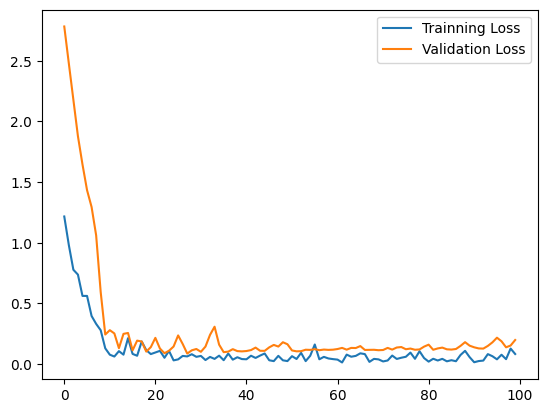

In [ ]:
plt.plot(history.history['loss'], label='Trainning Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
y_pred = model.predict(trainX[-n_future:])
y_pred_copied = np.repeat(y_pred, df.shape[1], axis=-1)
CO2_emission = scaler.inverse_transform(y_pred_copied)[:,0]
CO2_emission

1/1 [==============================] - 0s 313ms/step


array([0.35977927, 0.3771378 , 0.4018469 , 0.43276817, 0.46604183,
       0.49785122, 0.52863145, 0.5404545 , 0.53090316, 0.52359825,
       0.52005476], dtype=float32)

In [ ]:
CO2_emission = list(CO2_emission)

In [ ]:
# Calculate MSE
mse = mean_squared_error(df['CEM'][-11:], CO2_emission)
print(f"Mean Squared Error: {mse}")

mape = mean_absolute_percentage_error(df['CEM'][-11:], CO2_emission)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 0.0012342790276722087
Mean Absolute Percentage Error: 0.03932147519908485


In [ ]:
# Calculate and print R-squared value
r_squared = r2_score(df['CEM'][-11:], CO2_emission)
print(f"R-squared (Accuracy) on Test Data: {r_squared * 100:.2f}%")

R-squared (Accuracy) on Test Data: 81.36%


In [ ]:
Years = df_o['Year']

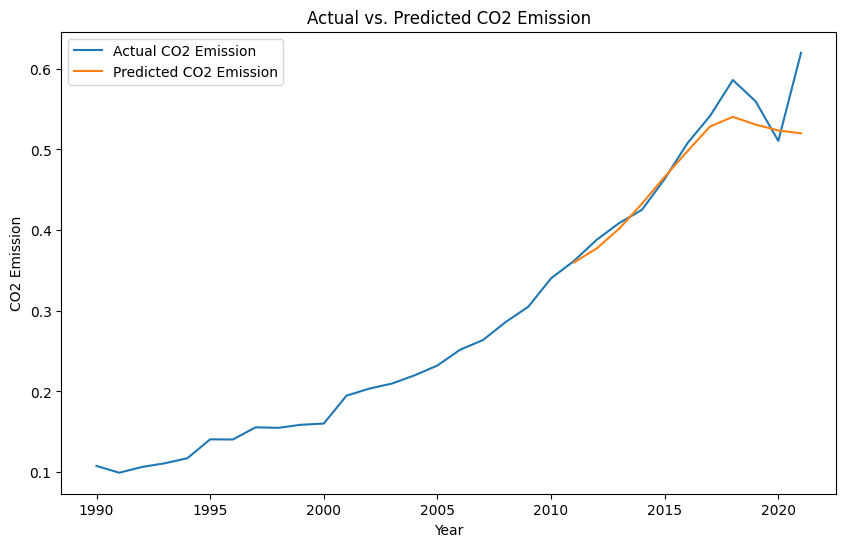

In [ ]:
# Plotting the trend of CO2 emissions
plt.figure(figsize=(10, 6))
plt.plot(Years[0:32], df['CEM'] , label='Actual CO2 Emission')
plt.plot(Years[21:32], CO2_emission, label='Predicted CO2 Emission')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()
plt.title('Actual vs. Predicted CO2 Emission')
plt.show()

# **Final Prediction**

In [ ]:
# Load your dataset (replace 'dataset.csv' with your dataset file)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [ ]:
df['CEM'] = pd.to_numeric(df['CEM'], errors='coerce')

In [ ]:
df = df.astype(float)

In [ ]:
# Extract relevant columns
data = df.iloc[:, 1:].values  # Exclude the first column (Year)

In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
data_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
46,NaN,96.436096,74.352249,22.403505,16.363920,9.094055,10.919236,6.003382,14.002560,18833.13281,90.022087,8.477510e+11,1.622670e+12,23.989126,7202.296875,204614352.0,27.931906,31.249926,53.715462
47,NaN,111.118843,74.346542,22.403513,16.365223,9.110925,10.919230,6.003386,14.002557,18833.13281,91.089729,8.883570e+11,2.019810e+12,23.889898,7235.169922,207726864.0,27.932446,31.295317,55.268833
48,NaN,135.643677,74.341934,22.403513,16.363785,9.124284,10.919226,6.003386,14.002556,18833.13281,92.214493,9.325390e+11,2.681580e+12,23.735689,7263.360352,211003088.0,27.933533,31.336668,56.960083
49,NaN,179.736786,74.340767,22.403509,16.361273,9.135361,10.919223,6.003386,14.002556,18833.13281,93.403450,9.810170e+11,3.882870e+12,23.530048,7287.521973,214458736.0,27.934326,31.376154,58.832485
50,NaN,262.319519,74.344177,22.403507,16.359262,9.144857,10.919221,6.003386,14.002554,18833.13281,94.664459,1.033270e+12,6.226670e+12,23.279898,7308.209473,218126560.0,27.934546,31.414970,60.904926


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_df)

In [ ]:
df_scaled

array([[-1.14753246e+00, -6.49262245e-01, -2.73159490e+00,
         2.01098575e+00,  2.19285819e+00, -7.37160453e-01,
         2.22360800e+00,  2.02423832e+00, -1.47781748e-01,
         1.60601944e+00, -1.97231409e+00, -9.92123934e-01,
        -5.47375233e-01, -1.42105116e+00, -5.68666059e-01,
        -1.69692469e+00,  1.97121778e+00, -1.95773340e+00,
        -1.36626878e+00],
       [-1.19995293e+00, -5.47596872e-01,  2.46606982e+00,
         2.26789110e+00, -1.47997821e+00,  3.88857418e-01,
         1.75447015e+00, -1.30054200e+00,  1.82991038e+00,
         1.60600660e+00, -2.03547952e+00, -9.94190038e-01,
        -5.47949074e-01, -1.23135081e+00, -5.43565884e-01,
        -1.62859473e+00,  2.06691551e+00, -1.96947562e+00,
        -1.32771172e+00],
       [-1.15559335e+00, -5.07655769e-01,  1.78065737e+00,
         1.91320741e+00, -2.28503369e+00,  7.67671697e-01,
         1.20760132e+00, -1.52713720e+00,  2.61239313e+00,
         1.60599376e+00, -1.88320188e+00, -9.91767578e-01,
    

In [ ]:
data.shape

(51, 19)

In [ ]:
# Define the future years for which you want to predict 'CEM'
future_years = range(2022, 2041)  # Years from 2023 to 2040

In [ ]:
# Prepare the training data
look_back = 10  # Window size for historical data

X_train, y_train = [], []

# Create a rolling window of 10 years to predict 'CEM' for each year from 2023 to 2040
for i in range(22):
    X_train.append(df_scaled[i:i+look_back])
    y_train.append(df_scaled[i+look_back, 0])  # Assuming 'CEM' is the first column

In [ ]:
y_train[21]

2.0481048124465406

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(22, 10, 19)

In [ ]:
# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True ))
model.add(LSTM(32, activation='relu',return_sequences=False ))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(32, activation='relu'))
model.add(LSTM(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for 'CEM'
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.1, verbose=2)

Epoch 1/100
19/19 - 3s - loss: 0.5693 - accuracy: 0.0000e+00 - val_loss: 2.4236 - val_accuracy: 0.0000e+00 - 3s/epoch - 158ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2448 - accuracy: 0.0000e+00 - val_loss: 0.6968 - val_accuracy: 0.0000e+00 - 144ms/epoch - 8ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0595 - accuracy: 0.0000e+00 - val_loss: 0.3180 - val_accuracy: 0.0000e+00 - 158ms/epoch - 8ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0410 - accuracy: 0.0000e+00 - val_loss: 1.2876 - val_accuracy: 0.0000e+00 - 166ms/epoch - 9ms/step
Epoch 5/100
19/19 - 0s - loss: 0.2077 - accuracy: 0.0000e+00 - val_loss: 1.4664 - val_accuracy: 0.0000e+00 - 172ms/epoch - 9ms/step
Epoch 6/100
19/19 - 0s - loss: 0.2355 - accuracy: 0.0000e+00 - val_loss: 1.3626 - val_accuracy: 0.0000e+00 - 150ms/epoch - 8ms/step
Epoch 7/100
19/19 - 0s - loss: 0.1304 - accuracy: 0.0000e+00 - val_loss: 0.5923 - val_accuracy: 0.0000e+00 - 148ms/epoch - 8ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0356 - accuracy: 0.0000e+00 - val_loss: 0.12

In [ ]:
df_scaled[22:32, :]

array([[ 6.00288339e-01, -3.75415386e-01, -9.38674285e-01,
        -3.23696051e-01,  8.13181456e-01, -1.39639382e+00,
        -5.53832991e-01,  1.91043220e-01,  2.56008344e-01,
        -5.74739592e-01,  3.82872793e-02, -6.64060436e-01,
        -4.42576479e-01, -7.42556659e-01, -5.18236258e-01,
        -2.31203744e-01, -2.32399072e-01,  2.50551561e+00,
        -3.13125002e-01],
       [ 7.30988276e-01, -2.99722043e-01, -1.05571054e+00,
        -6.18901145e-01,  7.41566103e-01, -2.05476169e+00,
        -7.69282662e-01,  3.45883109e-01, -8.88357158e-01,
        -6.38201241e-01,  5.14564857e-02, -6.10429718e-01,
        -4.26343143e-01, -6.08684396e-01, -5.14551172e-01,
        -1.67951375e-01, -2.58089738e-01,  2.22763551e+00,
        -2.46644329e-01],
       [ 8.33266616e-01, -2.81424842e-01, -9.21390812e-01,
        -4.27338767e-01, -1.12341130e-01, -2.21642850e+00,
        -6.04423585e-01, -2.84056812e-02, -4.99862972e-01,
        -7.01662891e-01,  1.18620857e-01, -5.36620180e-01,
    

In [ ]:
# Predict 'CEM' values for the future years
start = 22
end = 32
future_values = []
inputs = df_scaled[start:end, :]  # Last 10 years of data
input_data = np.reshape(inputs, (1, look_back, 19))  # Reshape for prediction
predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value

future_values.append(predicted_value)


1/1 [==============================] - 1s 557ms/step


In [ ]:
i = 1

In [ ]:
inputs = df_scaled[start+i:32+i, :]  # Roll one step forward

In [ ]:
inputs

array([[ 7.30988276e-01, -2.99722043e-01, -1.05571054e+00,
        -6.18901145e-01,  7.41566103e-01, -2.05476169e+00,
        -7.69282662e-01,  3.45883109e-01, -8.88357158e-01,
        -6.38201241e-01,  5.14564857e-02, -6.10429718e-01,
        -4.26343143e-01, -6.08684396e-01, -5.14551172e-01,
        -1.67951375e-01, -2.58089738e-01,  2.22763551e+00,
        -2.46644329e-01],
       [ 8.33266616e-01, -2.81424842e-01, -9.21390812e-01,
        -4.27338767e-01, -1.12341130e-01, -2.21642850e+00,
        -6.04423585e-01, -2.84056812e-02, -4.99862972e-01,
        -7.01662891e-01,  1.18620857e-01, -5.36620180e-01,
        -4.05503277e-01, -5.65390599e-01, -2.63769065e-01,
        -1.04970670e-01, -3.62136934e-01,  1.95468621e+00,
        -1.79817852e-01],
       [ 1.07227757e+00, -2.77529997e-01, -2.08654358e+00,
        -9.07217298e-01, -2.44644028e-01, -9.60090017e-01,
        -7.16725117e-01,  3.49596337e+00, -5.77667121e-01,
        -7.65124540e-01,  1.50681009e-01, -4.65067421e-01,
    

In [ ]:
inputs[-1, 0] = predicted_value  # Update 'CEM' with predicted value

In [ ]:
inputs

array([[ 7.30988276e-01, -2.99722043e-01, -1.05571054e+00,
        -6.18901145e-01,  7.41566103e-01, -2.05476169e+00,
        -7.69282662e-01,  3.45883109e-01, -8.88357158e-01,
        -6.38201241e-01,  5.14564857e-02, -6.10429718e-01,
        -4.26343143e-01, -6.08684396e-01, -5.14551172e-01,
        -1.67951375e-01, -2.58089738e-01,  2.22763551e+00,
        -2.46644329e-01],
       [ 8.33266616e-01, -2.81424842e-01, -9.21390812e-01,
        -4.27338767e-01, -1.12341130e-01, -2.21642850e+00,
        -6.04423585e-01, -2.84056812e-02, -4.99862972e-01,
        -7.01662891e-01,  1.18620857e-01, -5.36620180e-01,
        -4.05503277e-01, -5.65390599e-01, -2.63769065e-01,
        -1.04970670e-01, -3.62136934e-01,  1.95468621e+00,
        -1.79817852e-01],
       [ 1.07227757e+00, -2.77529997e-01, -2.08654358e+00,
        -9.07217298e-01, -2.44644028e-01, -9.60090017e-01,
        -7.16725117e-01,  3.49596337e+00, -5.77667121e-01,
        -7.65124540e-01,  1.50681009e-01, -4.65067421e-01,
    

In [ ]:
input_data = np.reshape(inputs, (1, look_back, 19))  # Reshape for prediction
predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value
future_values.append(predicted_value)

1/1 [==============================] - 0s 35ms/step


In [ ]:
future_values

[1.9427927, 1.8658011]

In [ ]:
# Predict 'CEM' values for the future years
start = 22
end = 32
future_values = []
inputs = df_scaled[start:end, :]  # Last 10 years of data

for i in range(1,20):
  input_data = np.reshape(inputs, (1, look_back, 19))  # Reshape for prediction
  predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value
  future_values.append(predicted_value)
  inputs = df_scaled[start+i:end+i, :]  # Roll one step forward
  inputs[-1, 0] = predicted_value  # Update 'CEM' with predicted value


1/1 [==============================] - 0s 25ms/step


In [ ]:
future_values

[1.9427927,
 1.8658011,
 1.6826475,
 1.5492254,
 1.2442937,
 1.1493261,
 1.1007866,
 1.062463,
 1.044003,
 1.0538021,
 1.0385495,
 1.0150687,
 1.0033274,
 1.0019772,
 1.0087827,
 1.0321461,
 1.0587022,
 1.0923009,
 1.1352614]

In [ ]:
# Predict 'CEM' values for the future years
future_values = []
inputs = data[22:32, :]  # Last 10 years of data
input_data = np.reshape(inputs, (1, look_back, data.shape[1]))  # Reshape for prediction
predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value
predicted_value

1/1 [==============================] - 0s 24ms/step


6979416000.0

In [ ]:
# Define the future years for which you want to predict 'CEM'
future_years = range(2022, 2041)  # Years from 2022 to 2040

# Predict 'CEM' values for the future years
future_values = []
inputs = data[22:32, :]  # Last 10 years of data

for year in future_years:
    input_data = np.reshape(inputs, (1, look_back, data.shape[1]))  # Reshape for prediction
    predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value
    future_values.append(predicted_value)

    # Update the input data for the next year's prediction
    inputs = np.roll(inputs, shift=-1, axis=0)  # Roll one step forward for all columns
    inputs[-1, 0] = predicted_value  # Update the predicted 'CEM' value

# 'future_values' now contains the predicted 'CEM' values for the years 2023 to 2040


1/1 [==============================] - 0s 33ms/step


In [ ]:
future_values

[6979416000.0,
 -11683666000.0,
 -7309980700.0,
 -11819428000.0,
 -11334813000.0,
 -18007826000.0,
 -12351966000.0,
 -14043678000.0,
 368595970.0,
 7826444300.0,
 6222181000.0,
 -1373214600.0,
 15552618000.0,
 -50873078000.0,
 -4844396000.0,
 2505456400.0,
 3653976600.0,
 -11786565000.0,
 246986750.0]